In [18]:
import pandas as pd
df = pd.read_csv('/content/Spam_SMS.csv')
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5574, 2)

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [20]:
# Encode the 'Class' column
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [21]:
# Split data into training and testing sets
X = df['Message']
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Use a simple bag-of-words approach to convert text to numerical features
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
# Convert y_train and y_test to categorical for ANN
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [25]:
# Create the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 output nodes for 'ham' and 'spam'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
history = model.fit(X_train_vec.toarray(), y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8842 - loss: 0.3606 - val_accuracy: 0.9798 - val_loss: 0.0841
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9957 - loss: 0.0164 - val_accuracy: 0.9832 - val_loss: 0.0705
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9798 - val_loss: 0.0946
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 7.9415e-04 - val_accuracy: 0.9776 - val_loss: 0.1132
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 1.0000 - loss: 4.1936e-04 - val_accuracy: 0.9787 - val_loss: 0.1174
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 1.0000 - loss: 2.1051e-04 - val_accuracy: 0.9787 - val_loss: 0.1244
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 1.0000 - loss: 1.3162e-04 - val_accuracy: 0.9787 - val_loss: 0.1293
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 1.0000 - loss: 1

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_vec.toarray(), y_test_cat)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9890 - loss: 0.0796
Test Loss: 0.11913740634918213
Test Accuracy: 0.9838564991950989


In [29]:
# Predict on the test set
y_pred = model.predict(X_test_vec.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [30]:
# Print classification report and confusion matrix
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       1.00      0.89      0.94       161

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.98      0.98      0.98      1115

[[954   0]
 [ 18 143]]


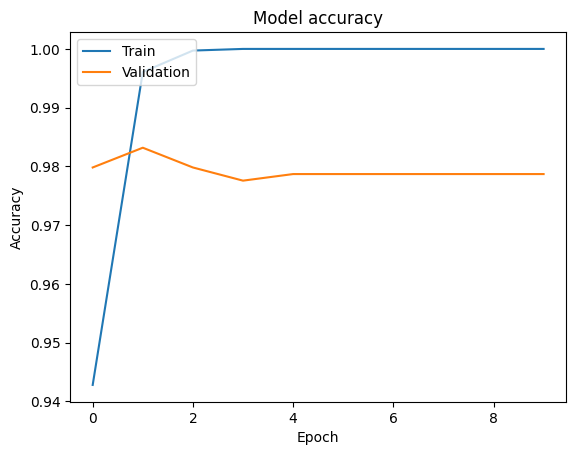

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

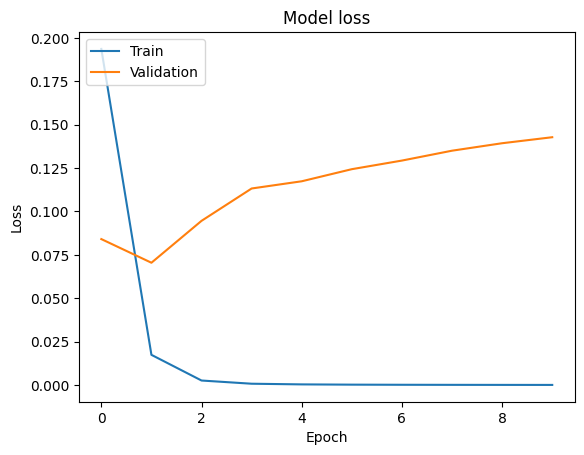

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()